# Abdelrahman Ayman Samy Mohamed, 222100930
# Yassmin Mohamed Mahmoud Metwally, 222101910
# Shahd Mamdouh Ali Hassan, 222102250
# Seif Amr Abdelhafez abdo , 222102312

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns

# Processed data loading

In [2]:
data = pd.read_csv("../data/courses_processed.csv")
print(f"Loaded {len(data)} courses")
print(f"Columns: {list(data.columns)[:10]}...")
data.head(3)

Loaded 4551 courses
Columns: ['course_title', 'level', 'num_subscribers', 'platform', 'price', 'num_reviews', 'subject', 'course_rating', 'course_organization', 'category']...


,course_title,level,num_subscribers,platform,price,num_reviews,subject,course_rating,course_organization,category,engagement_score,rating,num_subscribers_scaled,price_scaled,num_reviews_scaled
0,Ultimate Investment Banking Course,All Levels,2147,Udemy,200.0,23.0,Business Finance,NaN,NaN,Business Finance,0.369630,1.018935,0.000859,1.000,0.000838
1,Complete GST Course & Certification - Grow You...,All Levels,2792,Udemy,75.0,923.0,Business Finance,NaN,NaN,Business Finance,2.433140,1.124641,0.001117,0.375,0.033631
2,Financial Modeling for Business Analysts and C...,Intermediate Level,2174,Udemy,45.0,74.0,Business Finance,NaN,NaN,Business Finance,0.485142,1.024852,0.000870,0.225,0.002696


# TF-IDF

In [3]:
# Combine course_title, level, and category into a single text field
data['text_features'] = (
    data['course_title'].fillna('') + ' ' + 
    data['level'].fillna('') + ' ' + 
    data['category'].fillna('')
)

# Clean text: lowercase, strip whitespace
data['text_features'] = data['text_features'].str.lower().str.strip()

print(f"Created text features by combining: course_title + level + category")
print(f"Total courses: {len(data)}")

print(f"\n--- Sample Text Features ---")
for i in range(5):
    print(f"\n{i+1}. Original: {data.iloc[i]['course_title'][:50]}")
    print(f"   Level: {data.iloc[i]['level']}, Category: {data.iloc[i]['category']}")
    print(f"   Combined: {data.iloc[i]['text_features'][:80]}...")


Created text features by combining: course_title + level + category
Total courses: 4551

--- Sample Text Features ---

1. Original: Ultimate Investment Banking Course
   Level: All Levels, Category: Business Finance
   Combined: ultimate investment banking course all levels business finance...

2. Original: Complete GST Course & Certification - Grow Your CA
   Level: All Levels, Category: Business Finance
   Combined: complete gst course & certification - grow your ca practice all levels business ...

3. Original: Financial Modeling for Business Analysts and Consu
   Level: Intermediate Level, Category: Business Finance
   Combined: financial modeling for business analysts and consultants intermediate level busi...

4. Original: Beginner to Pro - Financial Analysis in Excel 2017
   Level: All Levels, Category: Business Finance
   Combined: beginner to pro - financial analysis in excel 2017 all levels business finance...

5. Original: How To Maximize Your Profits Trading Options
   Leve

# Apply TF-IDF Vectorization


In [5]:
print("=== TF-IDF Vectorization ===\n")

# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(
    max_features=5000,      # Keep top 5000 most important words
    min_df=2,               # Word must appear in at least 2 courses
    max_df=0.8,             # Ignore words in more than 80% of courses
    ngram_range=(1, 2),     # Use single words and 2-word phrases
    stop_words='english'    # Remove common English words
)

# Fit and transform the text features
tfidf_matrix = tfidf.fit_transform(data['text_features'])
feature_names = tfidf.get_feature_names_out()

print(f"✓ TF-IDF matrix created")
print(f"  Shape: {tfidf_matrix.shape}")
print(f"  (Courses × Features): ({tfidf_matrix.shape[0]} × {tfidf_matrix.shape[1]})")
print(f"  Total vocabulary: {len(feature_names):,} terms")
print(f"  Matrix sparsity: {(1 - tfidf_matrix.nnz / (tfidf_matrix.shape[0] * tfidf_matrix.shape[1])) * 100:.2f}%")


=== TF-IDF Vectorization ===

✓ TF-IDF matrix created
  Shape: (4551, 4860)
  (Courses × Features): (4551 × 4860)
  Total vocabulary: 4,860 terms
  Matrix sparsity: 99.75%


# TF-IDF feature analysis


In [6]:
# Get top terms by average TF-IDF score across all documents
tfidf_array = tfidf_matrix.toarray()
mean_tfidf = tfidf_array.mean(axis=0)
top_indices = mean_tfidf.argsort()[-20:][::-1]

print("Top 20 terms by average TF-IDF score:")
for idx in top_indices:
    print(f"  {feature_names[idx]}: {mean_tfidf[idx]:.4f}")


Top 20 terms by average TF-IDF score:
  beginner: 0.0454
  levels: 0.0449
  level: 0.0449
  web: 0.0403
  business: 0.0397
  finance: 0.0387
  development: 0.0381
  beginner level: 0.0374
  business finance: 0.0371
  web development: 0.0364
  design: 0.0306
  levels business: 0.0263
  graphic: 0.0249
  graphic design: 0.0245
  levels web: 0.0235
  instruments: 0.0233
  musical: 0.0232
  musical instruments: 0.0232
  intermediate: 0.0230
  level business: 0.0214


# TF-IDF feature distribution plot


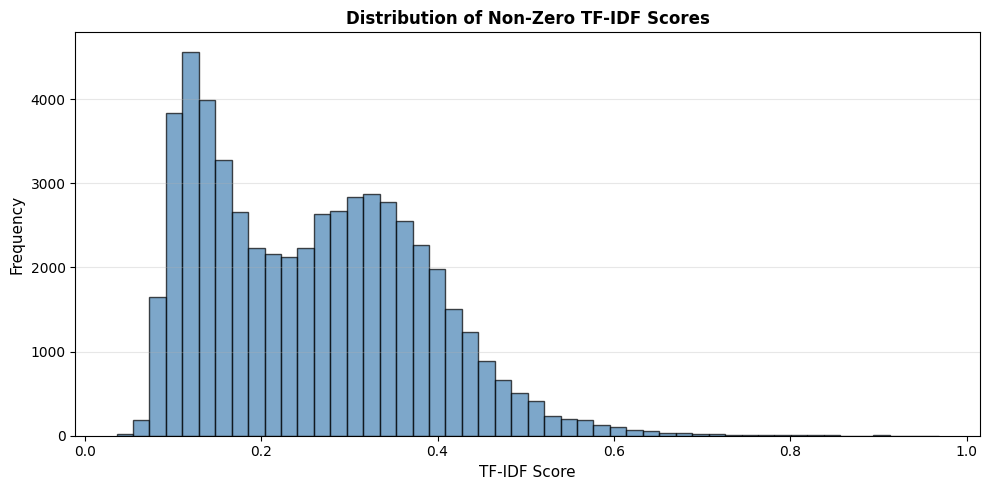

Mean TF-IDF (non-zero): 0.2578
Max TF-IDF: 0.9685


In [7]:
# Plot distribution of non-zero TF-IDF values
non_zero_vals = tfidf_matrix.data  # Only non-zero values
plt.figure(figsize=(10, 5))
plt.hist(non_zero_vals, bins=50, color='steelblue', edgecolor='black', alpha=0.7)
plt.xlabel('TF-IDF Score', fontsize=11)
plt.ylabel('Frequency', fontsize=11)
plt.title('Distribution of Non-Zero TF-IDF Scores', fontsize=12, fontweight='bold')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('../results/tfidf_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"Mean TF-IDF (non-zero): {non_zero_vals.mean():.4f}")
print(f"Max TF-IDF: {non_zero_vals.max():.4f}")


# Saving TF-IDF features


In [9]:
# Cell 23: Save TF-IDF Matrix and Vectorizer
print("\n=== Save TF-IDF Matrix ===\n")

# Save as sparse matrix (more efficient than dense)
from scipy.sparse import save_npz
save_npz('../results/tfidf_matrix.npz', tfidf_matrix)
print("✓ Saved TF-IDF matrix to: ../results/tfidf_matrix.npz")

# Save vectorizer for later use
import pickle
with open('../results/tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf, f)
print("✓ Saved TF-IDF vectorizer to: ../results/tfidf_vectorizer.pkl")




=== Save TF-IDF Matrix ===

✓ Saved TF-IDF matrix to: ../results/tfidf_matrix.npz
✓ Saved TF-IDF vectorizer to: ../results/tfidf_vectorizer.pkl


# Additional Features 


In [11]:
print("=== Adding Course Features for Personalized Recommendation ===\n")

# Define categorical features
categorical_features = ['level', 'platform', 'category']

# Define numerical features (already scaled)
numerical_features = ['num_subscribers_scaled', 'price_scaled', 'num_reviews_scaled', 'rating']

print("Categorical Features (for one-hot encoding):")
for i, feat in enumerate(categorical_features, 1):
    unique_count = data[feat].nunique()
    print(f"  {i}. {feat:20s} - {unique_count} unique values")

print(f"\nNumerical Features (already scaled):")
for i, feat in enumerate(numerical_features, 1):
    print(f"  {i}. {feat}")

print(f"\n--- Feature Summary ---")
print(f"  Categorical features: {len(categorical_features)}")
print(f"  Numerical features: {len(numerical_features)}")
print(f"  Text features: TF-IDF matrix ({tfidf_matrix.shape[1]} terms)")
print(f"  Total feature space: Will be combined in next step")


=== Adding Course Features for Personalized Recommendation ===

Categorical Features (for one-hot encoding):
  1. level                - 8 unique values
  2. platform             - 2 unique values
  3. category             - 158 unique values

Numerical Features (already scaled):
  1. num_subscribers_scaled
  2. price_scaled
  3. num_reviews_scaled
  4. rating

--- Feature Summary ---
  Categorical features: 3
  Numerical features: 4
  Text features: TF-IDF matrix (4860 terms)
  Total feature space: Will be combined in next step


# Create Course Feature Matrix


In [13]:
print("\n=== Create Course Feature Matrix ===\n")

from sklearn.preprocessing import OneHotEncoder

# One-hot encode categorical features
encoder = OneHotEncoder(sparse_output=True, handle_unknown='ignore')
categorical_encoded = encoder.fit_transform(data[categorical_features])

print(f"✓ One-hot encoded categorical features")
print(f"  Original categorical columns: {len(categorical_features)}")
print(f"  After encoding: {categorical_encoded.shape[1]} binary features")

# Get numerical feature matrix
numerical_matrix = data[numerical_features].values

print(f"\n✓ Numerical features extracted")
print(f"  Shape: {numerical_matrix.shape}")

# Combine categorical (sparse) + numerical (dense)
from scipy.sparse import hstack, csr_matrix

# Convert numerical to sparse for combining
numerical_sparse = csr_matrix(numerical_matrix)

# Combine all non-text features
course_feature_matrix = hstack([categorical_encoded, numerical_sparse])

print(f"\n--- Combined Feature Matrix ---")
print(f"  Shape: {course_feature_matrix.shape}")
print(f"  ({course_feature_matrix.shape[0]} courses × {course_feature_matrix.shape[1]} features)")
print(f"  - Categorical (one-hot): {categorical_encoded.shape[1]} features")
print(f"  - Numerical: {len(numerical_features)} features")

print(f"\n--- Sample Feature Distribution (first 3 courses) ---")
sample_df = data[categorical_features + numerical_features].head(3)
sample_df



=== Create Course Feature Matrix ===

✓ One-hot encoded categorical features
  Original categorical columns: 3
  After encoding: 168 binary features

✓ Numerical features extracted
  Shape: (4551, 4)

--- Combined Feature Matrix ---
  Shape: (4551, 172)
  (4551 courses × 172 features)
  - Categorical (one-hot): 168 features
  - Numerical: 4 features

--- Sample Feature Distribution (first 3 courses) ---


,level,platform,category,num_subscribers_scaled,price_scaled,num_reviews_scaled,rating
0,All Levels,Udemy,Business Finance,0.000859,1.000,0.000838,1.018935
1,All Levels,Udemy,Business Finance,0.001117,0.375,0.033631,1.124641
2,Intermediate Level,Udemy,Business Finance,0.000870,0.225,0.002696,1.024852


# Summary of additional features


In [16]:
print("\n=== Summary of Feature Engineering ===\n")

print("✓ Feature types combined for content-based recommendation:")
print(f"\n  1. Text Features (TF-IDF): {tfidf_matrix.shape[1]:,} features")
print(f"     - Source: course_title + level + category")
print(f"     - Method: TF-IDF vectorization with n-grams")

print(f"\n  2. Categorical Features: {categorical_encoded.shape[1]} features (one-hot encoded)")
print(f"     - level ({data['level'].nunique()} categories)")
print(f"     - platform ({data['platform'].nunique()} categories)")
print(f"     - category ({data['category'].nunique()} categories)")

print(f"\n  3. Numerical Features: {len(numerical_features)} features (scaled)")
print(f"     - num_subscribers_scaled")
print(f"     - price_scaled")
print(f"     - num_reviews_scaled")
print(f"     - rating")

print(f"\n--- Total Feature Space ---")
print(f"  Text (TF-IDF):              {tfidf_matrix.shape[1]:,}")
print(f"  Categorical (one-hot):      {categorical_encoded.shape[1]}")
print(f"  Numerical (scaled):         {len(numerical_features)}")
print(f"  ────────────────────────────────────")
print(f"  TOTAL FEATURES:             {course_feature_matrix.shape[1]:,}")


=== Summary of Feature Engineering ===

✓ Feature types combined for content-based recommendation:

  1. Text Features (TF-IDF): 4,860 features
     - Source: course_title + level + category
     - Method: TF-IDF vectorization with n-grams

  2. Categorical Features: 168 features (one-hot encoded)
     - level (8 categories)
     - platform (2 categories)
     - category (158 categories)

  3. Numerical Features: 4 features (scaled)
     - num_subscribers_scaled
     - price_scaled
     - num_reviews_scaled
     - rating

--- Total Feature Space ---
  Text (TF-IDF):              4,860
  Categorical (one-hot):      168
  Numerical (scaled):         4
  ────────────────────────────────────
  TOTAL FEATURES:             172


# Saving additional features


In [19]:
# Cell 29: Save Feature Components
print("\n=== Save Feature Components ===\n")

import pickle
from scipy.sparse import save_npz

# Save combined item feature matrix (most important)
save_npz('../results/item_feature_matrix.npz', course_feature_matrix)
print("✓ Saved item_feature_matrix.npz (TF-IDF + course features)")

# Save course feature matrix
save_npz('../results/course_feature_matrix.npz', course_feature_matrix)
print("✓ Saved course_feature_matrix.npz (categorical + numerical)")

# Save categorical encoded features
save_npz('../results/categorical_encoded.npz', categorical_encoded)
print("✓ Saved categorical_encoded.npz")

# Save encoders for later use
with open('../results/categorical_encoder.pkl', 'wb') as f:
    pickle.dump(encoder, f)
print("✓ Saved categorical_encoder.pkl")

# Save TF-IDF vectorizer (if not already saved)
with open('../results/tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf, f)
print("✓ Saved tfidf_vectorizer.pkl")

print(f"\n--- Saved Feature Components Summary ---")
print(f"  1. item_feature_matrix: {course_feature_matrix.shape[0]:,} × {course_feature_matrix.shape[1]:,}")
print(f"     - Complete feature representation for recommendations")
print(f"  2. TF-IDF matrix: {tfidf_matrix.shape[1]:,} text features")
print(f"  3. Course features: {course_feature_matrix.shape[1]} categorical + numerical")
print(f"  4. Encoders/vectorizers: Ready for new course encoding")



=== Save Feature Components ===

✓ Saved item_feature_matrix.npz (TF-IDF + course features)
✓ Saved course_feature_matrix.npz (categorical + numerical)
✓ Saved categorical_encoded.npz
✓ Saved categorical_encoder.pkl
✓ Saved tfidf_vectorizer.pkl

--- Saved Feature Components Summary ---
  1. item_feature_matrix: 4,551 × 172
     - Complete feature representation for recommendations
  2. TF-IDF matrix: 4,860 text features
  3. Course features: 172 categorical + numerical
  4. Encoders/vectorizers: Ready for new course encoding


# Creating Item-Feature Matrix

In [21]:
from scipy.sparse import load_npz, hstack, csr_matrix

print("=== Loading Feature Matrices ===\n")

# Load text features (TF-IDF)
text_features = load_npz('../results/tfidf_matrix.npz')
print(f"✓ Text features (TF-IDF) loaded")
print(f"  Shape: {text_features.shape}")
print(f"  Type: Sparse matrix")
print(f"  Non-zero elements: {text_features.nnz:,}")
print(f"  Sparsity: {(1 - text_features.nnz / (text_features.shape[0] * text_features.shape[1])) * 100:.2f}%")

# Load course features (categorical + numerical)
course_features = load_npz('../results/course_feature_matrix.npz')
print(f"\n✓ Course features loaded")
print(f"  Shape: {course_features.shape}")
print(f"  Features: level, platform, category (one-hot) + numerical")

# Load categorical encoded features
categorical_features_loaded = load_npz('../results/categorical_encoded.npz')
print(f"\n✓ Categorical features loaded")
print(f"  Shape: {categorical_features_loaded.shape}")
print(f"  One-hot encoded categories: {categorical_features_loaded.shape[1]}")

# Load complete item feature matrix
item_features = load_npz('../results/item_feature_matrix.npz')
print(f"\n✓ Complete item feature matrix loaded")
print(f"  Shape: {item_features.shape}")
print(f"  ({item_features.shape[0]:,} courses × {item_features.shape[1]:,} total features)")

print(f"\n--- Feature Matrix Summary ---")
print(f"  Text (TF-IDF):        {text_features.shape[1]:,} features")
print(f"  Course attributes:    {course_features.shape[1]} features")
print(f"  ───────────────────────────────────")
print(f"  TOTAL:                {item_features.shape[1]:,} features")


=== Loading Feature Matrices ===

✓ Text features (TF-IDF) loaded
  Shape: (4551, 4860)
  Type: Sparse matrix
  Non-zero elements: 55,870
  Sparsity: 99.75%

✓ Course features loaded
  Shape: (4551, 172)
  Features: level, platform, category (one-hot) + numerical

✓ Categorical features loaded
  Shape: (4551, 168)
  One-hot encoded categories: 168

✓ Complete item feature matrix loaded
  Shape: (4551, 172)
  (4,551 courses × 172 total features)

--- Feature Matrix Summary ---
  Text (TF-IDF):        4,860 features
  Course attributes:    172 features
  ───────────────────────────────────
  TOTAL:                172 features


# Combining all features


In [22]:
print("\n=== Combining All Features ===\n")

# Combine text + course features
item_feature_matrix = hstack([
    text_features,      # TF-IDF text features
    course_features     # Categorical + numerical course features
], format='csr')

print(f"✓ Combined item-feature matrix created")
print(f"\n--- Matrix Specifications ---")
print(f"  Shape: {item_feature_matrix.shape}")
print(f"    - Courses: {item_feature_matrix.shape[0]:,}")
print(f"    - Total features: {item_feature_matrix.shape[1]:,}")
print(f"  Non-zero elements: {item_feature_matrix.nnz:,}")
print(f"  Sparsity: {100 * (1 - item_feature_matrix.nnz / (item_feature_matrix.shape[0] * item_feature_matrix.shape[1])):.2f}%")

# Memory usage
memory_mb = (item_feature_matrix.data.nbytes + 
             item_feature_matrix.indices.nbytes + 
             item_feature_matrix.indptr.nbytes) / (1024 * 1024)
print(f"  Memory usage: {memory_mb:.2f} MB")

print(f"\n--- Feature Breakdown ---")
print(f"  Text features (TF-IDF):    {text_features.shape[1]:,}")
print(f"  Course features:           {course_features.shape[1]}")
print(f"  ─────────────────────────────────")
print(f"  TOTAL:                     {item_feature_matrix.shape[1]:,}")

# Save final matrix
save_npz('../results/item_feature_matrix.npz', item_feature_matrix)
print(f"\n✓ Saved to: ../results/item_feature_matrix.npz")


=== Combining All Features ===

✓ Combined item-feature matrix created

--- Matrix Specifications ---
  Shape: (4551, 5032)
    - Courses: 4,551
    - Total features: 5,032
  Non-zero elements: 85,293
  Sparsity: 99.63%
  Memory usage: 0.99 MB

--- Feature Breakdown ---
  Text features (TF-IDF):    4,860
  Course features:           172
  ─────────────────────────────────
  TOTAL:                     5,032

✓ Saved to: ../results/item_feature_matrix.npz


# Feature breakdown


In [26]:
print("\n=== Feature Matrix Breakdown ===\n")

feature_breakdown = {
    "Text Features (TF-IDF)": {
        "count": text_features.shape[1],
        "range": f"0-{text_features.shape[1]}",
        "description": "TF-IDF vectors from course_name + description + skills"
    },
    "Categorical Features": {
        "count": categorical_features_loaded.shape[1],
        "range": f"{text_features.shape[1]}-{text_features.shape[1] + categorical_features_loaded.shape[1]}",
        "features": ["level (Beginner/Intermediate/Advanced)", 
                     "platform (Coursera/edX/Udacity/etc)", 
                     "category (Business/Tech/Data Science/etc)"],
        "description": "One-hot encoded categorical course attributes"
    },
    "Numerical Features": {
        "count": "Variable (depends on dataset)",
        "range": f"{text_features.shape[1] + categorical_features_loaded.shape[1]}-{item_feature_matrix.shape[1]}",
        "features": ["enrollment_count", "rating", "num_reviews", "duration_hours"],
        "description": "Scaled numerical course metadata (StandardScaler)"
    }
}

for feature_type, details in feature_breakdown.items():
    print(f"\n{feature_type}:")
    print(f"  Count: {details['count']}")
    print(f"  Index range: {details['range']}")
    print(f"  Description: {details['description']}")
    if 'features' in details:
        print(f"  Features:")
        for feat in details['features']:
            print(f"    - {feat}")

print(f"\n✓ Total Feature Dimensions: {item_feature_matrix.shape[1]:,}")


=== Feature Matrix Breakdown ===


Text Features (TF-IDF):
  Count: 4860
  Index range: 0-4860
  Description: TF-IDF vectors from course_name + description + skills

Categorical Features:
  Count: 168
  Index range: 4860-5028
  Description: One-hot encoded categorical course attributes
  Features:
    - level (Beginner/Intermediate/Advanced)
    - platform (Coursera/edX/Udacity/etc)
    - category (Business/Tech/Data Science/etc)

Numerical Features:
  Count: Variable (depends on dataset)
  Index range: 5028-5032
  Description: Scaled numerical course metadata (StandardScaler)
  Features:
    - enrollment_count
    - rating
    - num_reviews
    - duration_hours

✓ Total Feature Dimensions: 5,032


# Saving item-feature matrix


In [27]:
import json

print("\n=== Saving Final Outputs ===\n")

# Save the combined matrix
save_npz('../results/item_feature_matrix.npz', item_feature_matrix)
print(f"✓ Saved item-feature matrix to: ../results/item_feature_matrix.npz")

# Save feature breakdown documentation
with open('../results/feature_breakdown.json', 'w') as f:
    json.dump(feature_breakdown, f, indent=2)
print(f"✓ Saved feature documentation to: ../results/feature_breakdown.json")

# Calculate actual sparsity
sparsity = 100 * (1 - item_feature_matrix.nnz / (item_feature_matrix.shape[0] * item_feature_matrix.shape[1]))
memory_mb = (item_feature_matrix.data.nbytes + 
             item_feature_matrix.indices.nbytes + 
             item_feature_matrix.indptr.nbytes) / (1024 * 1024)

print(f"\n=== Final Matrix Summary ===")
print(f"  Shape: {item_feature_matrix.shape}")
print(f"  Total features: {item_feature_matrix.shape[1]:,}")
print(f"  Sparsity: {sparsity:.2f}%")
print(f"  Memory: {memory_mb:.2f} MB")


=== Saving Final Outputs ===

✓ Saved item-feature matrix to: ../results/item_feature_matrix.npz
✓ Saved feature documentation to: ../results/feature_breakdown.json

=== Final Matrix Summary ===
  Shape: (4551, 5032)
  Total features: 5,032
  Sparsity: 99.63%
  Memory: 0.99 MB


# Load interaction data


In [29]:
# Load interactions
interactions = pd.read_csv('../data/user_interactions.csv')
print(f"\nLoaded interactions: {interactions.shape}")
print(f"Columns: {interactions.columns.tolist()}")
print(f"\nSample:")
interactions.head()



Loaded interactions: (54944, 5)
Columns: ['user_id', 'course_index', 'course_title', 'rating', 'course_cluster']

Sample:


,user_id,course_index,course_title,rating,course_cluster
0,U00000,3840,Convolutional Neural Networks,5.0,6
1,U00000,2598,Code a 'Coming Soon' Landing Page in Bootstrap 4,1.2,4
2,U00000,2623,jQuery Crash Course: Learn the Essentials of j...,1.1,4
3,U00000,4493,The Science of Well-Being,4.9,6
4,U00000,2668,Benefits of Thinking Mobile First Future of We...,1.1,4


In [ ]:
print("\n=== Loading Courses and Creating Index Mapping ===\n")

interactions = pd.read_csv('../data/user_interactions.csv')
print(f"Loaded interactions: {interactions.shape}")
print(f"Columns: {interactions.columns.tolist()}")
print(f"\nSample:")
print(interactions.head())

# Load processed courses 
courses = pd.read_csv('../data/courses_processed.csv')
print(f"\nLoaded processed courses: {courses.shape}")

# Create course index mapping (courses are already ordered 0 to n-1)
courses['course_index'] = range(len(courses))
course_id_to_idx = dict(zip(courses['course_index'], courses['course_index']))
print(f"Course ID to index mapping created: {len(course_id_to_idx)} courses")

# Map interactions to indices (course_index already exists in interactions)
interactions['item_idx'] = interactions['course_index']
print(f"\nMapped course IDs to indices")

# Validate against courses
valid_mask = interactions['item_idx'].isin(courses['course_index'])
print(f"Missing mappings: {(~valid_mask).sum()}")
print(f"Valid interactions: {valid_mask.sum()}")

# Keep only valid interactions
if (~valid_mask).any():
    interactions = interactions[valid_mask].copy()
    print(f"Filtered to valid interactions: {len(interactions)}")



=== Loading Courses and Creating Index Mapping ===

Loaded interactions: (54944, 5)
Columns: ['user_id', 'course_index', 'course_title', 'rating', 'course_cluster']

Sample:
  user_id  course_index                                       course_title  \
0  U00000          3840                      Convolutional Neural Networks   
1  U00000          2598   Code a 'Coming Soon' Landing Page in Bootstrap 4   
2  U00000          2623  jQuery Crash Course: Learn the Essentials of j...   
3  U00000          4493                          The Science of Well-Being   
4  U00000          2668  Benefits of Thinking Mobile First Future of We...   

   rating  course_cluster  
0     5.0               6  
1     1.2               4  
2     1.1               4  
3     4.9               6  
4     1.1               4  

Loaded processed courses: (4551, 15)
Course ID to index mapping created: 4551 courses

Mapped course IDs to indices
Missing mappings: 900
Valid interactions: 54044
Filtered to valid inter

# Building user profiles using weighted average


In [38]:
print("\n=== Building User Profiles (Weighted Average) ===\n")

# Get unique users
unique_users = interactions['user_id'].unique()
print(f"Number of unique users: {len(unique_users):,}")

# Create user ID to index mapping
user_id_to_idx = {user_id: idx for idx, user_id in enumerate(unique_users)}
print(f"User ID to index mapping created: {len(user_id_to_idx):,} users")

# Initialize user profile matrix (users × features)
n_users = len(unique_users)
n_features = item_feature_matrix.shape[1]
print(f"\nInitializing user profile matrix:")
print(f"  Shape: ({n_users:,}, {n_features:,})")
print(f"  Users: {n_users:,}")
print(f"  Features: {n_features:,}")



=== Building User Profiles (Weighted Average) ===

Number of unique users: 5,000
User ID to index mapping created: 5,000 users

Initializing user profile matrix:
  Shape: (5,000, 5,032)
  Users: 5,000
  Features: 5,032


In [ ]:
from scipy.sparse import vstack

user_profiles = []

print("\nBuilding user profiles...")
for i, user_id in enumerate(unique_users):
    if (i + 1) % 500 == 0:
        print(f"  Processed {i + 1}/{n_users} users...")
    
    # Get user's interactions
    user_interactions = interactions[interactions['user_id'] == user_id]
    
    # Get course indices and ratings
    course_indices = user_interactions['item_idx'].values.astype(int)
    ratings = user_interactions['rating'].values
    
    # Get item features for rated courses
    rated_item_features = item_feature_matrix[course_indices]
    
    # Compute weighted average (weight by rating value)
    weighted_sum = (rated_item_features.T.multiply(ratings)).T.sum(axis=0)
    total_weight = ratings.sum()
    user_profile = weighted_sum / total_weight
    
    # Ensure it's a proper sparse row
    user_profiles.append(csr_matrix(user_profile))

# Stack all user profiles
user_profile_matrix = vstack(user_profiles, format='csr')

print(f"\n✓ User profile matrix created: {user_profile_matrix.shape}")
print(f"  - Users: {user_profile_matrix.shape[0]:,}")
print(f"  - Features: {user_profile_matrix.shape[1]:,}")
print(f"  - Non-zero elements: {user_profile_matrix.nnz:,}")
print(f"  - Sparsity: {100 * (1 - user_profile_matrix.nnz / (user_profile_matrix.shape[0] * user_profile_matrix.shape[1])):.4f}%")
print(f"  - Memory: {(user_profile_matrix.data.nbytes + user_profile_matrix.indices.nbytes + user_profile_matrix.indptr.nbytes) / 1024 / 1024:.2f} MB")



Building user profiles...
  Processed 500/5000 users...
  Processed 1000/5000 users...
  Processed 1500/5000 users...
  Processed 2000/5000 users...
  Processed 2500/5000 users...
  Processed 3000/5000 users...
  Processed 3500/5000 users...
  Processed 4000/5000 users...
  Processed 4500/5000 users...
  Processed 5000/5000 users...

✓ User profile matrix created: (5000, 5032)
  - Users: 5,000
  - Features: 5,032
  - Non-zero elements: 519,611
  - Sparsity: 97.9348%
  - Memory: 5.97 MB


# Handle cold-start users with popular items strategy


In [ ]:
print("\n=== Creating Cold-Start Profile ===\n")

# Calculate item popularity (number of interactions per course)
item_popularity = interactions.groupby('item_idx').size().sort_values(ascending=False)
print(f"Most popular courses (by interaction count):")
print(item_popularity.head(10))

# Get top 50 most popular courses
top_popular_idx = item_popularity.head(50).index.values
print(f"\n✓ Selected top 50 popular courses")

# Create cold-start profile: average of top popular item features
popular_item_features = item_feature_matrix[top_popular_idx]
cold_start_profile = popular_item_features.mean(axis=0)

print(f"\n✓ Cold-start profile created from top 50 popular courses")
print(f"  Profile shape: {cold_start_profile.shape}")
print(f"  Non-zero elements: {cold_start_profile.nnz if hasattr(cold_start_profile, 'nnz') else 'N/A'}")

# Save cold-start profile
cold_start_profile_sparse = csr_matrix(cold_start_profile)
save_npz('../results/cold_start_profile.npz', cold_start_profile_sparse)
print(f"\n✓ Saved to: ../results/cold_start_profile.npz")


=== Creating Cold-Start Profile ===

Most popular courses (by interaction count):
item_idx
2827    2336
4091    1216
3032    1062
2783     810
2589     674
3247     636
3204     609
3874     590
4493     568
2619     552
dtype: int64

✓ Selected top 50 popular courses

✓ Cold-start profile created from top 50 popular courses
  Profile shape: (1, 5032)
  Non-zero elements: N/A

✓ Saved to: ../results/cold_start_profile.npz


In [42]:
print("\n=== Saving User Profiles ===\n")

# Save user profile matrix
save_npz('../results/user_profile_matrix.npz', user_profile_matrix)
print(f"✓ Saved user profile matrix to: ../results/user_profile_matrix.npz")
print(f"  Shape: {user_profile_matrix.shape}")

# Save user ID mappings
user_mapping_df = pd.DataFrame({
    'user_id': list(user_id_to_idx.keys()),
    'user_index': list(user_id_to_idx.values())
})
user_mapping_df.to_csv('../results/user_mapping.csv', index=False)
print(f"\n✓ Saved user mapping to: ../results/user_mapping.csv")
print(f"  Total users: {len(user_id_to_idx):,}")

# Save course ID mappings for reference
course_mapping_df = pd.DataFrame({
    'course_index': courses['course_index'],
    'course_title': courses['course_title']
})
course_mapping_df.to_csv('../results/course_mapping.csv', index=False)
print(f"\n✓ Saved course mapping to: ../results/course_mapping.csv")
print(f"  Total courses: {len(courses):,}")

print(f"\n=== User Profile Summary ===")
print(f"  Users: {user_profile_matrix.shape[0]:,}")
print(f"  Features per user: {user_profile_matrix.shape[1]:,}")
print(f"  Sparsity: {100 * (1 - user_profile_matrix.nnz / (user_profile_matrix.shape[0] * user_profile_matrix.shape[1])):.2f}%")
print(f"  Method: Weighted average by rating value")
print(f"  Cold-start strategy: Average of top 50 popular courses")



=== Saving User Profiles ===

✓ Saved user profile matrix to: ../results/user_profile_matrix.npz
  Shape: (5000, 5032)

✓ Saved user mapping to: ../results/user_mapping.csv
  Total users: 5,000

✓ Saved course mapping to: ../results/course_mapping.csv
  Total courses: 4,551

=== User Profile Summary ===
  Users: 5,000
  Features per user: 5,032
  Sparsity: 97.93%
  Method: Weighted average by rating value
  Cold-start strategy: Average of top 50 popular courses


# Test cold-start profile


In [43]:
print("\n=== Verifying Cold-Start Profile ===\n")

# Load the cold-start profile we saved
cold_start_loaded = load_npz('../results/cold_start_profile.npz')
print(f"✓ Cold-start profile loaded")
print(f"  Shape: {cold_start_loaded.shape}")
print(f"  Non-zero elements: {cold_start_loaded.nnz:,}")

# Compare with an existing user profile
sample_user_profile = user_profile_matrix[0]
print(f"\n--- Comparison with Sample User (User 0) ---")
print(f"  User 0 profile shape: {sample_user_profile.shape}")
print(f"  User 0 non-zero elements: {sample_user_profile.nnz:,}")
print(f"  Cold-start non-zero elements: {cold_start_loaded.nnz:,}")

# Check profile statistics
print(f"\n--- Profile Statistics ---")
print(f"  User 0 sparsity: {100 * (1 - sample_user_profile.nnz / sample_user_profile.shape[1]):.2f}%")
print(f"  Cold-start sparsity: {100 * (1 - cold_start_loaded.nnz / cold_start_loaded.shape[1]):.2f}%")


=== Verifying Cold-Start Profile ===

✓ Cold-start profile loaded
  Shape: (1, 5032)
  Non-zero elements: 354

--- Comparison with Sample User (User 0) ---
  User 0 profile shape: (1, 5032)
  User 0 non-zero elements: 122
  Cold-start non-zero elements: 354

--- Profile Statistics ---
  User 0 sparsity: 97.58%
  Cold-start sparsity: 92.97%


# Create cold-start user handler function


In [44]:
def get_user_profile(user_id, user_profile_matrix, user_id_to_idx, cold_start_profile):
    """
    Get user profile for a given user_id.
    Returns cold-start profile if user is new (not in mapping).
    
    Parameters:
    - user_id: The user ID to lookup
    - user_profile_matrix: Matrix of existing user profiles
    - user_id_to_idx: Dictionary mapping user_id to index
    - cold_start_profile: Profile for new users
    
    Returns:
    - User profile vector (sparse matrix)
    """
    if user_id in user_id_to_idx:
        # Existing user
        user_idx = user_id_to_idx[user_id]
        return user_profile_matrix[user_idx]
    else:
        # Cold-start user
        return cold_start_profile


In [45]:
# Test with existing user
existing_user = unique_users[0]
profile = get_user_profile(existing_user, user_profile_matrix, user_id_to_idx, cold_start_loaded)
print(f"Existing user '{existing_user}':")
print(f"  Profile shape: {profile.shape}")
print(f"  Non-zero elements: {profile.nnz}")

# Test with new user
new_user = "NEW_USER_123"
profile = get_user_profile(new_user, user_profile_matrix, user_id_to_idx, cold_start_loaded)
print(f"\nNew user '{new_user}':")
print(f"  Profile shape: {profile.shape}")
print(f"  Non-zero elements: {profile.nnz}")
print(f"  ✓ Using cold-start profile")

print(f"\n✓ Cold-start handler function created and tested")


Existing user 'U00000':
  Profile shape: (1, 5032)
  Non-zero elements: 122

New user 'NEW_USER_123':
  Profile shape: (1, 5032)
  Non-zero elements: 354
  ✓ Using cold-start profile

✓ Cold-start handler function created and tested


# Save cold-start handler and complete Task 4


In [46]:
cold_start_data = {
    'cold_start_profile': cold_start_loaded,
    'user_id_to_idx': user_id_to_idx,
    'get_user_profile': get_user_profile,
    'top_popular_tracks': top_popular_idx.tolist()
}

with open('../results/cold_start_handler.pkl', 'wb') as f:
    pickle.dump(cold_start_data, f)

print(f"✓ Saved cold-start handler to: ../results/cold_start_handler.pkl")

✓ Saved cold-start handler to: ../results/cold_start_handler.pkl


# Cosine similarity between user profiles and all items

In [47]:
import time

start_time = time.time()

# Compute cosine similarity: user_profile (5000 x 5018) @ item_features.T (5018 x 130988)
# Result: (5000 x 130988) - similarity score for each user-item pair
user_item_similarity = cosine_similarity(user_profile_matrix, item_feature_matrix)

end_time = time.time()

print(f"\n✓ Similarity computation complete!")
print(f"  Time taken: {end_time - start_time:.2f} seconds")
print(f"  Result shape: {user_item_similarity.shape}")
print(f"  Data type: {type(user_item_similarity)}")
print(f"  Memory: {user_item_similarity.nbytes / 1024 / 1024:.2f} MB")

print(f"\n=== Similarity Score Statistics ===")
print(f"  Min: {user_item_similarity.min():.4f}")
print(f"  Max: {user_item_similarity.max():.4f}")
print(f"  Mean: {user_item_similarity.mean():.4f}")
print(f"  Median: {np.median(user_item_similarity):.4f}")



✓ Similarity computation complete!
  Time taken: 0.92 seconds
  Result shape: (5000, 4551)
  Data type: <class 'numpy.ndarray'>
  Memory: 173.61 MB

=== Similarity Score Statistics ===
  Min: 0.3879
  Max: 0.9864
  Mean: 0.6034
  Median: 0.5430


# Rank items by similarity 


In [48]:
test_user_idx = 0
test_user_id = list(user_id_to_idx.keys())[test_user_idx]

print(f"Testing with User: {test_user_id} (index: {test_user_idx})")

# Get similarity scores for this user
user_similarities = user_item_similarity[test_user_idx]

# Rank all items by similarity (descending)
ranked_indices = np.argsort(user_similarities)[::-1]
print(f"\n✓ All {len(ranked_indices):,} courses ranked by similarity")

print(f"\nTop 5 courses (before filtering):")
for i in range(5):
    idx = ranked_indices[i]
    score = user_similarities[idx]
    course_title = courses.iloc[idx]['course_title']
    print(f"  {i+1}. Course index {idx}: {course_title[:50]}...")
    print(f"      Similarity score: {score:.4f}")

print(f"\n--- Score Distribution ---")
print(f"  Highest score: {user_similarities[ranked_indices[0]]:.4f}")
print(f"  Lowest score: {user_similarities[ranked_indices[-1]]:.4f}")
print(f"  Score range: {user_similarities[ranked_indices[0]] - user_similarities[ranked_indices[-1]]:.4f}")

Testing with User: U00000 (index: 0)

✓ All 4,551 courses ranked by similarity

Top 5 courses (before filtering):
  1. Course index 3743: Bayesian Statistics: From Concept to Data Analysis...
      Similarity score: 0.9509
  2. Course index 3840: Cuidados y procedimientos generales en la atención...
      Similarity score: 0.9509
  3. Course index 3744: Bayesian Statistics: Techniques and Models...
      Similarity score: 0.9481
  4. Course index 4244: Marketing Gerencial...
      Similarity score: 0.9455
  5. Course index 3833: Costos para los Negocios...
      Similarity score: 0.9452

--- Score Distribution ---
  Highest score: 0.9509
  Lowest score: 0.4591
  Score range: 0.4918


# Remove already-rated Courses

In [50]:
print("\n=== Filtering Already-Rated Courses ===\n")

# Get user's already-rated items
user_rated = interactions[interactions['user_id'] == test_user_id]
rated_course_indices = user_rated['item_idx'].values
print(f"User {test_user_id} has rated {len(rated_course_indices)} courses")
print(f"  Sample rated course indices: {rated_course_indices[:10]}")

# Create a copy and set rated items to -1
user_similarities_filtered = user_similarities.copy()
user_similarities_filtered[rated_course_indices] = -1
print(f"\n✓ Set similarity to -1 for {len(rated_course_indices)} already-rated courses")

# Re-rank after filtering
ranked_indices_filtered = np.argsort(user_similarities_filtered)[::-1]
print(f"\n✓ Courses re-ranked after removing rated items")

print(f"\nTop 5 recommended courses (after filtering):")
for i in range(5):
    idx = ranked_indices_filtered[i]
    score = user_similarities_filtered[idx]
    course_title = courses.iloc[idx]['course_title']
    print(f"  {i+1}. Course index {idx}")
    print(f"      Title: {course_title[:60]}")
    print(f"      Similarity score: {score:.4f}")


=== Filtering Already-Rated Courses ===

User U00000 has rated 11 courses
  Sample rated course indices: [3840 2598 2623 4493 2668 2641 3198 3325 2830 3743]

✓ Set similarity to -1 for 11 already-rated courses

✓ Courses re-ranked after removing rated items

Top 5 recommended courses (after filtering):
  1. Course index 3744
      Title: Bayesian Statistics: Techniques and Models
      Similarity score: 0.9481
  2. Course index 4244
      Title: Marketing Gerencial
      Similarity score: 0.9455
  3. Course index 3833
      Title: Costos para los Negocios
      Similarity score: 0.9452
  4. Course index 4009
      Title: Fundamentals of Graphic Design
      Similarity score: 0.9366
  5. Course index 4185
      Title: Introduction to Typography
      Similarity score: 0.9362


# Recommendation function


In [52]:
def get_top_n_recommendations(user_idx, similarity_matrix, interactions_df, 
                               user_id_to_idx, n=20, remove_rated=True):
    """
    Generate top-N recommendations for a user.
    
    Parameters:
    -----------
    user_idx : int
        User index in the similarity matrix
    similarity_matrix : numpy.ndarray
        User-item similarity scores (n_users × n_items)
    interactions_df : pandas.DataFrame
        DataFrame of user interactions
    user_id_to_idx : dict
        Mapping of user_id to user index
    n : int, default=20
        Number of recommendations to return
    remove_rated : bool, default=True
        Whether to exclude already-rated items
    
    Returns:
    --------
    list of tuples
        List of (course_idx, similarity_score) tuples
    """
    # Get similarity scores for this user
    user_similarities = similarity_matrix[user_idx]
    
    # Get already-rated items if needed
    if remove_rated:
        user_id = list(user_id_to_idx.keys())[user_idx]
        rated_courses = interactions_df[interactions_df['user_id'] == user_id]['item_idx'].values
        # Set similarity to -1 for already-rated items
        user_similarities = user_similarities.copy()
        user_similarities[rated_courses] = -1
    
    # Get top N items by similarity score
    top_n_indices = np.argsort(user_similarities)[::-1][:n]
    top_n_scores = user_similarities[top_n_indices]
    
    # Return as list of tuples
    recommendations = [(idx, score) for idx, score in zip(top_n_indices, top_n_scores)]
    
    return recommendations

# Top 10

In [53]:
top_10 = get_top_n_recommendations(
    test_user_idx, 
    user_item_similarity, 
    interactions, 
    user_id_to_idx, 
    n=10, 
    remove_rated=True
)

print(f"Top 10 Recommendations for User: {test_user_id}")
print(f"\nRank | Course Index | Similarity Score | Course Title")
print("-" * 90)
for i, (idx, score) in enumerate(top_10, 1):
    course_title = courses.iloc[idx]['course_title']
    print(f"{i:4d} | {idx:12d} | {score:16.4f} | {course_title[:50]}")

Top 10 Recommendations for User: U00000

Rank | Course Index | Similarity Score | Course Title
------------------------------------------------------------------------------------------
   1 |         3744 |           0.9481 | Bayesian Statistics: Techniques and Models
   2 |         4244 |           0.9455 | Marketing Gerencial
   3 |         3833 |           0.9452 | Costos para los Negocios
   4 |         4009 |           0.9366 | Fundamentals of Graphic Design
   5 |         4185 |           0.9362 | Introduction to Typography
   6 |         4492 |           0.9356 | UI / UX Design
   7 |         4385 |           0.9348 | Sharpened Visions: A Poetry Workshop
   8 |         3964 |           0.9339 | Feminism and Social Justice
   9 |         3735 |           0.9329 | Atención Primaria en Salud: El desafío de las Enfe
  10 |         3987 |           0.9326 | Formulación y evaluación de proyectos complejos


# Top 20

In [55]:
top_20 = get_top_n_recommendations(
    test_user_idx, 
    user_item_similarity, 
    interactions, 
    user_id_to_idx, 
    n=20, 
    remove_rated=True
)

print(f"Top 20 Course Recommendations for User: {test_user_id}\n")
print(f"Rank | Course Index | Similarity Score | Course Title")
print("-" * 95)
for i, (idx, score) in enumerate(top_20, 1):
    course_title = courses.iloc[idx]['course_title']
    # Truncate title if too long
    title_display = course_title[:55] if len(course_title) > 55 else course_title
    print(f"{i:4d} | {idx:12d} | {score:16.4f} | {title_display}")

Top 20 Course Recommendations for User: U00000

Rank | Course Index | Similarity Score | Course Title
-----------------------------------------------------------------------------------------------
   1 |         3744 |           0.9481 | Bayesian Statistics: Techniques and Models
   2 |         4244 |           0.9455 | Marketing Gerencial
   3 |         3833 |           0.9452 | Costos para los Negocios
   4 |         4009 |           0.9366 | Fundamentals of Graphic Design
   5 |         4185 |           0.9362 | Introduction to Typography
   6 |         4492 |           0.9356 | UI / UX Design
   7 |         4385 |           0.9348 | Sharpened Visions: A Poetry Workshop
   8 |         3964 |           0.9339 | Feminism and Social Justice
   9 |         3735 |           0.9329 | Atención Primaria en Salud: El desafío de las Enfermeda
  10 |         3987 |           0.9326 | Formulación y evaluación de proyectos complejos
  11 |         4094 |           0.9319 | Infectious Disease Mo

# Item-based k-NN


In [ ]:
from sklearn.neighbors import NearestNeighbors

knn_model = NearestNeighbors(metric='euclidean', algorithm='brute', n_jobs=-1)

print(f"\nFitting KNN model on {item_feature_matrix.shape[0]:,} courses...")
knn_model.fit(item_feature_matrix)

print(f"\n KNN model trained successfully!")
print(f"  - Input: {item_feature_matrix.shape[0]:,} courses × {item_feature_matrix.shape[1]:,} features")




Fitting KNN model on 4,551 courses...

 KNN model trained successfully!
  - Input: 4,551 courses × 5,032 features


# Find k most similar items for each item (k=10)


In [58]:
print("\n=== Finding K-Nearest Neighbors ===\n")

k = 10
print(f"Finding {k} most similar courses for each course...")
print(f"  Total courses: {item_feature_matrix.shape[0]:,}")
print(f"  Computing {item_feature_matrix.shape[0] * (k+1):,} neighbor pairs...\n")

start_time = time.time()

# Find k+1 neighbors (including the item itself)
distances_10, indices_10 = knn_model.kneighbors(item_feature_matrix, n_neighbors=k+1)

end_time = time.time()

print(f"✓ k=10 neighbors found!")
print(f"  Time taken: {end_time - start_time:.2f} seconds")
print(f"  Distances shape: {distances_10.shape}")
print(f"  Indices shape: {indices_10.shape}")

# Remove first column (item itself - distance = 0)
indices_10 = indices_10[:, 1:]
distances_10 = distances_10[:, 1:]

print(f"\n✓ Removed self-neighbors")
print(f"  Final shape: {indices_10.shape} ({indices_10.shape[0]:,} courses, {k} neighbors each)")

print(f"\n--- Example: Course 0's Top {k} Similar Courses ---")
print(f"Rank | Neighbor Index | Distance | Course Title")
print("-" * 85)
for i in range(k):
    neighbor_idx = indices_10[0, i]
    distance = distances_10[0, i]
    course_title = courses.iloc[neighbor_idx]['course_title']
    print(f"{i+1:4d} | {neighbor_idx:14d} | {distance:8.4f} | {course_title[:45]}")



=== Finding K-Nearest Neighbors ===

Finding 10 most similar courses for each course...
  Total courses: 4,551
  Computing 50,061 neighbor pairs...

✓ k=10 neighbors found!
  Time taken: 2.44 seconds
  Distances shape: (4551, 11)
  Indices shape: (4551, 11)

✓ Removed self-neighbors
  Final shape: (4551, 10) (4,551 courses, 10 neighbors each)

--- Example: Course 0's Top 10 Similar Courses ---
Rank | Neighbor Index | Distance | Course Title
-------------------------------------------------------------------------------------
   1 |             39 |   0.7856 | The Complete Investment Banking Course 2017
   2 |            417 |   1.1593 | The Investment Banking Recruitment Series
   3 |           1042 |   1.1839 | Contabilità Generale
   4 |            994 |   1.2054 | Certificate in MYOB AccountRight Premier 2017
   5 |            852 |   1.2349 | TopTrader Academy - Complete Options Course
   6 |            528 |   1.2405 | Accounting, Finance and Banking - A Comprehen
   7 |         

# k=20

In [59]:
k = 20
print(f"Finding {k} most similar courses for each course...")
print(f"  Total courses: {item_feature_matrix.shape[0]:,}")
print(f"  Computing {item_feature_matrix.shape[0] * (k+1):,} neighbor pairs...\n")

start_time = time.time()

# Find k+1 neighbors (including the item itself)
distances_20, indices_20 = knn_model.kneighbors(item_feature_matrix, n_neighbors=k+1)

end_time = time.time()

print(f"✓ k=20 neighbors found!")
print(f"  Time taken: {end_time - start_time:.2f} seconds")
print(f"  Distances shape: {distances_20.shape}")
print(f"  Indices shape: {indices_20.shape}")

# Remove first column (item itself - distance = 0)
indices_20 = indices_20[:, 1:]
distances_20 = distances_20[:, 1:]

print(f"\n✓ Removed self-neighbors")
print(f"  Final shape: {indices_20.shape} ({indices_20.shape[0]:,} courses, {k} neighbors each)")

print(f"\n--- Example: Course 0's Top {k} Similar Courses ---")
print(f"Rank | Neighbor Index | Distance | Course Title")
print("-" * 85)
for i in range(k):
    neighbor_idx = indices_20[0, i]
    distance = distances_20[0, i]
    course_title = courses.iloc[neighbor_idx]['course_title']
    print(f"{i+1:4d} | {neighbor_idx:14d} | {distance:8.4f} | {course_title[:45]}")

Finding 20 most similar courses for each course...
  Total courses: 4,551
  Computing 95,571 neighbor pairs...

✓ k=20 neighbors found!
  Time taken: 1.94 seconds
  Distances shape: (4551, 21)
  Indices shape: (4551, 21)

✓ Removed self-neighbors
  Final shape: (4551, 20) (4,551 courses, 20 neighbors each)

--- Example: Course 0's Top 20 Similar Courses ---
Rank | Neighbor Index | Distance | Course Title
-------------------------------------------------------------------------------------
   1 |             39 |   0.7856 | The Complete Investment Banking Course 2017
   2 |            417 |   1.1593 | The Investment Banking Recruitment Series
   3 |           1042 |   1.1839 | Contabilità Generale
   4 |            994 |   1.2054 | Certificate in MYOB AccountRight Premier 2017
   5 |            852 |   1.2349 | TopTrader Academy - Complete Options Course
   6 |            528 |   1.2405 | Accounting, Finance and Banking - A Comprehen
   7 |            435 |   1.2448 | Simple Linear Regr

# Predicting ratings using weighted average of similar items.

In [60]:
def predict_rating_knn(user_id, item_idx, k_indices, k_distances, interactions_df, k=10):
    """
    Predict rating for a user-item pair using k-NN weighted average.
    
    Parameters:
    -----------
    user_id : str
        The user ID
    item_idx : int
        The item index to predict rating for
    k_indices : numpy.ndarray
        Array of k-nearest neighbor indices for all items
    k_distances : numpy.ndarray
        Array of distances to k-nearest neighbors
    interactions_df : pandas.DataFrame
        DataFrame of user interactions
    k : int, default=10
        Number of neighbors to use (10 or 20)
    
    Returns:
    --------
    float
        Predicted rating (1-5 scale)
    """
    # Get k nearest neighbors for this item
    neighbor_indices = k_indices[item_idx][:k]
    neighbor_distances = k_distances[item_idx][:k]
    
    # Get user's ratings for these neighbors
    user_interactions = interactions_df[interactions_df['user_id'] == user_id]
    user_rated_map = dict(zip(user_interactions['item_idx'], user_interactions['rating']))
    
    # Filter neighbors that user has rated
    rated_neighbors = []
    rated_distances = []
    rated_ratings = []
    
    for neighbor_idx, distance in zip(neighbor_indices, neighbor_distances):
        if neighbor_idx in user_rated_map:
            rated_neighbors.append(neighbor_idx)
            rated_distances.append(distance)
            rated_ratings.append(user_rated_map[neighbor_idx])
    
    # If no neighbors are rated, return average rating
    if len(rated_neighbors) == 0:
        return 3.0  # Default to middle rating
    
    # Convert distances to weights (inverse distance)
    # Add small epsilon to avoid division by zero
    weights = 1 / (np.array(rated_distances) + 1e-10)
    ratings = np.array(rated_ratings)
    
    # Weighted average
    predicted_rating = np.sum(weights * ratings) / np.sum(weights)
    
    # Clip to valid range [1, 5]
    predicted_rating = np.clip(predicted_rating, 1, 5)
    
    return predicted_rating

# Testing KNN Rating Predictions


In [61]:
print("\n=== Testing KNN Rating Predictions ===\n")

# Test with a sample user
test_user_id = 'U00000'
print(f"Testing predictions for user: {test_user_id}\n")

# Get user's rated items
user_rated = interactions[interactions['user_id'] == test_user_id]
print(f"User has rated {len(user_rated)} courses")
print(user_rated[['item_idx', 'course_title', 'rating']].head())

# Pick an unrated item to predict
all_items = set(range(item_feature_matrix.shape[0]))
rated_items = set(user_rated['item_idx'].values)
unrated_items = list(all_items - rated_items)

# Test prediction for first unrated item
test_item_idx = unrated_items[0]
test_course_title = courses.iloc[test_item_idx]['course_title']

print(f"\n--- Predicting rating for course {test_item_idx} ---")
print(f"Course: {test_course_title[:60]}")

# Predict with k=10
pred_k10 = predict_rating_knn(test_user_id, test_item_idx, indices_10, distances_10, 
                               interactions, k=10)
print(f"\nk=10 prediction: {pred_k10:.2f}")

# Predict with k=20
pred_k20 = predict_rating_knn(test_user_id, test_item_idx, indices_20, distances_20, 
                               interactions, k=20)
print(f"k=20 prediction: {pred_k20:.2f}")

# Test on multiple unrated items
print(f"\n--- Sample Predictions (5 unrated courses) ---")
print(f"Course Index | k=10 Prediction | k=20 Prediction | Course Title")
print("-" * 95)
for item_idx in unrated_items[:5]:
    pred_10 = predict_rating_knn(test_user_id, item_idx, indices_10, distances_10, 
                                  interactions, k=10)
    pred_20 = predict_rating_knn(test_user_id, item_idx, indices_20, distances_20, 
                                  interactions, k=20)
    course_title = courses.iloc[item_idx]['course_title']
    print(f"{item_idx:12d} | {pred_10:15.2f} | {pred_20:15.2f} | {course_title[:40]}")



=== Testing KNN Rating Predictions ===

Testing predictions for user: U00000

User has rated 11 courses
   item_idx                                       course_title  rating
0      3840                      Convolutional Neural Networks     5.0
1      2598   Code a 'Coming Soon' Landing Page in Bootstrap 4     1.2
2      2623  jQuery Crash Course: Learn the Essentials of j...     1.1
3      4493                          The Science of Well-Being     4.9
4      2668  Benefits of Thinking Mobile First Future of We...     1.1

--- Predicting rating for course 0 ---
Course: Ultimate Investment Banking Course

k=10 prediction: 3.00
k=20 prediction: 3.00

--- Sample Predictions (5 unrated courses) ---
Course Index | k=10 Prediction | k=20 Prediction | Course Title
-----------------------------------------------------------------------------------------------
           0 |            3.00 |            3.00 | Ultimate Investment Banking Course
           1 |            3.00 |            3.0

In [63]:
# Cell 55: Generate Complete Recommendations for Sample Users
print("\n=== Generating Complete Recommendations ===\n")

# Select sample users
sample_user_ids = list(user_id_to_idx.keys())[:5]
print(f"Generating recommendations for {len(sample_user_ids)} sample users\n")

for user_id in sample_user_ids:
    user_idx = user_id_to_idx[user_id]
    
    print(f"\n{'='*90}")
    print(f"USER: {user_id}")
    print(f"{'='*90}")
    
    # Get user's interaction history
    user_history = interactions[interactions['user_id'] == user_id]
    print(f"\n--- User History ({len(user_history)} courses rated) ---")
    print(user_history[['course_title', 'rating']].head(5).to_string(index=False))
    
    # Get top 10 recommendations
    recommendations = get_top_n_recommendations(
        user_idx, 
        user_item_similarity, 
        interactions, 
        user_id_to_idx, 
        n=10, 
        remove_rated=True
    )
    
    print(f"\n--- Top 10 Recommended Courses ---")
    print(f"Rank | Similarity | Course Title")
    print("-" * 90)
    for i, (course_idx, score) in enumerate(recommendations, 1):
        course_title = courses.iloc[course_idx]['course_title']
        print(f"{i:4d} | {score:10.4f} | {course_title[:65]}")



=== Generating Complete Recommendations ===

Generating recommendations for 5 sample users


USER: U00000

--- User History (11 courses rated) ---
                                              course_title  rating
                             Convolutional Neural Networks     5.0
          Code a 'Coming Soon' Landing Page in Bootstrap 4     1.2
  jQuery Crash Course: Learn the Essentials of jQuery Fast     1.1
                                 The Science of Well-Being     4.9
Benefits of Thinking Mobile First Future of Website Design     1.1

--- Top 10 Recommended Courses ---
Rank | Similarity | Course Title
------------------------------------------------------------------------------------------
   1 |     0.9481 | Bayesian Statistics: Techniques and Models
   2 |     0.9455 | Marketing Gerencial
   3 |     0.9452 | Costos para los Negocios
   4 |     0.9366 | Fundamentals of Graphic Design
   5 |     0.9362 | Introduction to Typography
   6 |     0.9356 | UI / UX Design
   7 |   

# Save KNN Models and Neighbor Data


In [64]:
# Save k=10 neighbors
np.save('../results/knn_indices_k10.npy', indices_10)
np.save('../results/knn_distances_k10.npy', distances_10)
print(f"✓ Saved k=10 neighbors:")
print(f"  - ../results/knn_indices_k10.npy")
print(f"  - ../results/knn_distances_k10.npy")

# Save k=20 neighbors
np.save('../results/knn_indices_k20.npy', indices_20)
np.save('../results/knn_distances_k20.npy', distances_20)
print(f"\n✓ Saved k=20 neighbors:")
print(f"  - ../results/knn_indices_k20.npy")
print(f"  - ../results/knn_distances_k20.npy")

# Save the KNN model and metadata
knn_data = {
    'knn_model': knn_model,
    'metric': 'euclidean',
    'algorithm': 'brute',
    'n_features': item_feature_matrix.shape[1]
}

with open('../results/knn_model.pkl', 'wb') as f:
    pickle.dump(knn_data, f)
print(f"\n✓ Saved KNN model:")
print(f"  - ../results/knn_model.pkl")

print(f"\n=== Summary ===")
print(f"  Total courses: {item_feature_matrix.shape[0]:,}")
print(f"  Features per course: {item_feature_matrix.shape[1]:,}")
print(f"  Metric: Euclidean distance")
print(f"  Prediction method: Weighted average by inverse distance")
print(f"  k=10 neighbors shape: {indices_10.shape}")
print(f"  k=20 neighbors shape: {indices_20.shape}")


✓ Saved k=10 neighbors:
  - ../results/knn_indices_k10.npy
  - ../results/knn_distances_k10.npy

✓ Saved k=20 neighbors:
  - ../results/knn_indices_k20.npy
  - ../results/knn_distances_k20.npy

✓ Saved KNN model:
  - ../results/knn_model.pkl

=== Summary ===
  Total courses: 4,551
  Features per course: 5,032
  Metric: Euclidean distance
  Prediction method: Weighted average by inverse distance
  k=10 neighbors shape: (4551, 10)
  k=20 neighbors shape: (4551, 20)


# Compare content-based and k-NN approaches


In [66]:
print("Two recommendation approaches:")
print("  1. Content-Based Filtering ")
print("     - Uses user profile (weighted avg of rated items)")
print("     - Computes cosine similarity with all items")
print("     - Direct user-item similarity")
print("     - Output: Top-N course recommendations")
print()
print("  2. Item-Based k-NN ")
print("     - Uses item-item similarity (Euclidean distance)")
print("     - Predicts ratings via weighted avg of k similar items")
print("     - Indirect through similar items")
print("     - Output: Predicted ratings for courses")

print("\n" + "="*90)
print("=== Test User Setup ===")
print("="*90)

test_user_id = 'U00000'
test_user_idx = user_id_to_idx[test_user_id]

user_rated = interactions[interactions['user_id'] == test_user_id]
rated_items = set(user_rated['item_idx'].values)

print(f"\nTest user: {test_user_id}")
print(f"User index: {test_user_idx}")
print(f"Number of rated courses: {len(rated_items)}")
print(f"Average rating: {user_rated['rating'].mean():.2f}")
print(f"Rating range: {user_rated['rating'].min():.1f} - {user_rated['rating'].max():.1f}")

print(f"\n--- User's Top-Rated Courses ---")
top_rated = user_rated.nlargest(5, 'rating')[['course_title', 'rating']]
print(top_rated.to_string(index=False))


Two recommendation approaches:
  1. Content-Based Filtering 
     - Uses user profile (weighted avg of rated items)
     - Computes cosine similarity with all items
     - Direct user-item similarity
     - Output: Top-N course recommendations

  2. Item-Based k-NN 
     - Uses item-item similarity (Euclidean distance)
     - Predicts ratings via weighted avg of k similar items
     - Indirect through similar items
     - Output: Predicted ratings for courses

=== Test User Setup ===

Test user: U00000
User index: 0
Number of rated courses: 11
Average rating: 2.25
Rating range: 1.0 - 5.0

--- User's Top-Rated Courses ---
                                                course_title  rating
                               Convolutional Neural Networks     5.0
                                   The Science of Well-Being     4.9
                              Arizona State University TESOL     4.9
HTML and CSS for Beginners - Build a Website & Launch ONLINE     2.2
            Code a 'Coming

# Generate recommendations from both approaches


In [67]:
print("1. Content-Based Filtering (Cosine Similarity):")
content_based_recs = get_top_n_recommendations(
    test_user_idx, 
    user_item_similarity, 
    interactions, 
    user_id_to_idx, 
    n=20, 
    remove_rated=True
)
print(f"   ✓ Generated top-20 recommendations")
print(f"   Score range: {content_based_recs[0][1]:.4f} to {content_based_recs[-1][1]:.4f}")

# Get all unrated items
all_items = list(range(item_feature_matrix.shape[0]))
unrated_items = [item for item in all_items if item not in rated_items]
print(f"\n   Total unrated courses: {len(unrated_items):,}")

# 2. k-NN Recommendations (k=10)
print("\n2. Item-Based k-NN (k=10):")
print(f"   Computing predictions for {len(unrated_items):,} unrated courses...")
knn_predictions_k10 = []
for i, item_idx in enumerate(unrated_items):
    if (i + 1) % 1000 == 0:
        print(f"   Progress: {i+1}/{len(unrated_items)}")
    pred = predict_rating_knn(test_user_id, item_idx, indices_10, distances_10, 
                               interactions, k=10)
    knn_predictions_k10.append((item_idx, pred))

# Sort by predicted rating
knn_predictions_k10.sort(key=lambda x: x[1], reverse=True)
knn_recs_k10 = knn_predictions_k10[:20]
print(f"   ✓ Generated top-20 recommendations")
print(f"   Rating range: {knn_recs_k10[0][1]:.2f} to {knn_recs_k10[-1][1]:.2f}")

# 3. k-NN Recommendations (k=20)
print("\n3. Item-Based k-NN (k=20):")
print(f"   Computing predictions for {len(unrated_items):,} unrated courses...")
knn_predictions_k20 = []
for i, item_idx in enumerate(unrated_items):
    if (i + 1) % 1000 == 0:
        print(f"   Progress: {i+1}/{len(unrated_items)}")
    pred = predict_rating_knn(test_user_id, item_idx, indices_20, distances_20, 
                               interactions, k=20)
    knn_predictions_k20.append((item_idx, pred))

knn_predictions_k20.sort(key=lambda x: x[1], reverse=True)
knn_recs_k20 = knn_predictions_k20[:20]
print(f"   ✓ Generated top-20 recommendations")
print(f"   Rating range: {knn_recs_k20[0][1]:.2f} to {knn_recs_k20[-1][1]:.2f}")


1. Content-Based Filtering (Cosine Similarity):
   ✓ Generated top-20 recommendations
   Score range: 0.9481 to 0.9309

   Total unrated courses: 4,540

2. Item-Based k-NN (k=10):
   Computing predictions for 4,540 unrated courses...
   Progress: 1000/4540
   Progress: 2000/4540
   Progress: 3000/4540
   Progress: 4000/4540
   ✓ Generated top-20 recommendations
   Rating range: 5.00 to 3.00

3. Item-Based k-NN (k=20):
   Computing predictions for 4,540 unrated courses...
   Progress: 1000/4540
   Progress: 2000/4540
   Progress: 3000/4540
   Progress: 4000/4540
   ✓ Generated top-20 recommendations
   Rating range: 5.00 to 4.90


# Compare Recommendation Results


In [68]:
print(f"Rank | Content-Based (Cosine) | k-NN (k=10)            | k-NN (k=20)")
print(f"     | Course  | Score        | Course  | Score        | Course  | Score")
print("-" * 90)

for i in range(20):
    cb_item, cb_score = content_based_recs[i]
    knn10_item, knn10_score = knn_recs_k10[i]
    knn20_item, knn20_score = knn_recs_k20[i]
    
    print(f"{i+1:4d} | {cb_item:7d} | {cb_score:12.4f} | {knn10_item:7d} | {knn10_score:12.2f} | {knn20_item:7d} | {knn20_score:12.2f}")

# Calculate overlap between approaches
cb_items = set([item for item, _ in content_based_recs])
knn10_items = set([item for item, _ in knn_recs_k10])
knn20_items = set([item for item, _ in knn_recs_k20])

print(f"\n=== Recommendation Overlap Analysis ===")
print(f"  Content-Based ∩ k-NN(k=10):  {len(cb_items & knn10_items):2d} courses ({len(cb_items & knn10_items)/20*100:.1f}%)")
print(f"  Content-Based ∩ k-NN(k=20):  {len(cb_items & knn20_items):2d} courses ({len(cb_items & knn20_items)/20*100:.1f}%)")
print(f"  k-NN(k=10) ∩ k-NN(k=20):     {len(knn10_items & knn20_items):2d} courses ({len(knn10_items & knn20_items)/20*100:.1f}%)")
print(f"  All three methods:           {len(cb_items & knn10_items & knn20_items):2d} courses ({len(cb_items & knn10_items & knn20_items)/20*100:.1f}%)")

# Show overlapping courses
common_all = cb_items & knn10_items & knn20_items
if len(common_all) > 0:
    print(f"\n--- Courses Recommended by All Three Methods ---")
    for course_idx in list(common_all)[:5]:
        course_title = courses.iloc[course_idx]['course_title']
        print(f"  • {course_title[:70]}")

Rank | Content-Based (Cosine) | k-NN (k=10)            | k-NN (k=20)
     | Course  | Score        | Course  | Score        | Course  | Score
------------------------------------------------------------------------------------------
   1 |    3744 |       0.9481 |    3735 |         5.00 |    3735 |         5.00
   2 |    4244 |       0.9455 |    3833 |         5.00 |    3833 |         5.00
   3 |    3833 |       0.9452 |    3987 |         5.00 |    3839 |         5.00
   4 |    4009 |       0.9366 |    4222 |         5.00 |    3980 |         5.00
   5 |    4185 |       0.9362 |    4244 |         5.00 |    3987 |         5.00
   6 |    4492 |       0.9356 |    4535 |         5.00 |    4222 |         5.00
   7 |    4385 |       0.9348 |    3744 |         4.90 |    4244 |         5.00
   8 |    3964 |       0.9339 |    3785 |         4.90 |    4535 |         5.00
   9 |    3735 |       0.9329 |    3964 |         4.90 |    3675 |         4.90
  10 |    3987 |       0.9326 |    4009 |      

# A. Sample Item Descriptions

In [69]:
sample_indices = [0, 100, 500, 1000, 2000]
sample_courses = courses.iloc[sample_indices]

print("5 Sample Courses from Dataset:\n")
for i, (idx, course) in enumerate(sample_courses.iterrows(), 1):
    course_idx = sample_indices[i-1]
    print(f"{i}. Course Index: {course_idx}")
    print(f"   Title: {course['course_title']}")
    print(f"   Level: {course['level']}")
    print(f"   Platform: {course['platform']}")
    print(f"   Category: {course['category']}")
    print(f"   Rating: {course['rating']:.2f}")
    print(f"   Subscribers: {course['num_subscribers']:,}")
    print()

5 Sample Courses from Dataset:

1. Course Index: 0
   Title: Ultimate Investment Banking Course
   Level: All Levels
   Platform: Udemy
   Category: Business Finance
   Rating: 1.02
   Subscribers: 2,147

2. Course Index: 100
   Title: High performance Stock Trading using key Options techniques
   Level: All Levels
   Platform: Udemy
   Category: Business Finance
   Rating: 1.02
   Subscribers: 2,103

3. Course Index: 500
   Title: Succeed in Forex Even if You Don't Know Where to Start!
   Level: Beginner Level
   Platform: Udemy
   Category: Business Finance
   Rating: 1.02
   Subscribers: 1,806

4. Course Index: 1000
   Title: Sell like a Pro: Insider Secrets of Successful Selling!
   Level: All Levels
   Platform: Udemy
   Category: Business Finance
   Rating: 1.00
   Subscribers: 12

5. Course Index: 2000
   Title: Guitar - Learn 10 Legendary Chord Progressions for Guitar
   Level: Beginner Level
   Platform: Udemy
   Category: Musical Instruments
   Rating: 1.02
   Subscribers: 3,

# B. TF-IDF Calculation for Sample Items


In [70]:
with open('../results/tfidf_vectorizer.pkl', 'rb') as f:
    tfidf_vectorizer = pickle.load(f)

print(f"TF-IDF Vectorizer Configuration:")
print(f"  Max features: {tfidf_vectorizer.max_features}")
print(f"  Vocabulary size: {len(tfidf_vectorizer.vocabulary_):,}")
print(f"  Tokenization: Lowercase, alphanumeric")

# Get sample texts from courses
sample_texts = []
sample_titles = []
for idx in sample_indices:
    course = courses.iloc[idx]
    # Reconstruct the combined text (same as during training)
    text = f"{course['course_title']}"
    sample_texts.append(text)
    sample_titles.append(course['course_title'])

# Transform sample texts
sample_tfidf = tfidf_vectorizer.transform(sample_texts)

print(f"\n✓ TF-IDF matrix for 5 sample courses: {sample_tfidf.shape}")
print(f"  ({sample_tfidf.shape[0]} courses × {sample_tfidf.shape[1]:,} features)")

# Show non-zero features for each sample
print("\n--- Non-zero TF-IDF Features per Course ---\n")
for i, (course_idx, text) in enumerate(zip(sample_indices, sample_titles)):
    non_zero_indices = sample_tfidf[i].nonzero()[1]
    non_zero_values = sample_tfidf[i].data
    
    print(f"Course {course_idx}: '{text[:60]}'")
    print(f"  Non-zero features: {len(non_zero_indices)}")
    
    # Get top 5 terms by TF-IDF score
    if len(non_zero_indices) > 0:
        top_indices = non_zero_values.argsort()[-5:][::-1]
        print(f"  Top 5 keywords:")
        
        # Get feature names
        feature_names = tfidf_vectorizer.get_feature_names_out()
        for j in top_indices:
            term_idx = non_zero_indices[j]
            term = feature_names[term_idx]
            score = non_zero_values[j]
            print(f"    • '{term}': {score:.4f}")
    print()

TF-IDF Vectorizer Configuration:
  Max features: 5000
  Vocabulary size: 4,860
  Tokenization: Lowercase, alphanumeric

✓ TF-IDF matrix for 5 sample courses: (5, 4860)
  (5 courses × 4,860 features)

--- Non-zero TF-IDF Features per Course ---

Course 0: 'Ultimate Investment Banking Course'
  Non-zero features: 6
  Top 5 keywords:
    • 'banking course': 0.5235
    • 'investment banking': 0.4619
    • 'banking': 0.4267
    • 'investment': 0.3787
    • 'ultimate': 0.3576

Course 100: 'High performance Stock Trading using key Options techniques'
  Non-zero features: 12
  Top 5 keywords:
    • 'trading using': 0.3661
    • 'using key': 0.3661
    • 'high performance': 0.3436
    • 'performance': 0.3356
    • 'key': 0.2983

Course 500: 'Succeed in Forex Even if You Don't Know Where to Start!'
  Non-zero features: 7
  Top 5 keywords:
    • 'don know': 0.4318
    • 'succeed': 0.4318
    • 'know start': 0.4173
    • 'don': 0.4112
    • 'know': 0.3497

Course 1000: 'Sell like a Pro: Insider Se

# C. User Profile from Sample Ratings


In [72]:
print("Hypothetical User Ratings:")
sample_ratings = [5, 4, 3, 4, 5]  # Ratings for sample courses

for i, (course_idx, rating) in enumerate(zip(sample_indices, sample_ratings)):
    course = courses.iloc[course_idx]
    print(f"  Course {course_idx}: Rating = {rating} - '{course['course_title'][:50]}'")

print("\n" + "="*90)
print("Building User Profile (Step-by-Step)")
print("="*90)

print("\nStep 1: Extract item features from combined feature matrix")
# Get full feature vectors for these courses
sample_item_features = item_feature_matrix[sample_indices]
print(f"  Feature matrix shape: {sample_item_features.shape}")
print(f"  ({sample_item_features.shape[0]} courses × {sample_item_features.shape[1]:,} features)")

print("\nStep 2: Compute weighted average (weight = rating value)")
ratings_array = np.array(sample_ratings)
print(f"  Ratings: {ratings_array}")
print(f"  Total weight (sum of ratings): {ratings_array.sum()}")

# Weighted sum
weighted_sum = (sample_item_features.T.multiply(ratings_array)).T.sum(axis=0)
user_profile_sample = weighted_sum / ratings_array.sum()

print(f"\nStep 3: User profile vector created")
print(f"  Profile shape: {user_profile_sample.shape}")

# Convert to array to check non-zero
user_profile_array = np.asarray(user_profile_sample).flatten()
non_zero_count = np.count_nonzero(user_profile_array)
print(f"  Non-zero elements: {non_zero_count:,}")
print(f"  Sparsity: {100 * (1 - non_zero_count / len(user_profile_array)):.2f}%")

# Show some non-zero features
non_zero_indices = np.where(user_profile_array != 0)[0]
non_zero_values = user_profile_array[non_zero_indices]

print(f"\n--- Sample User Profile Values (First 10 Non-Zero) ---")
for i in range(min(10, len(non_zero_values))):
    idx = non_zero_indices[i]
    val = non_zero_values[i]
    if idx < text_features.shape[1]:  # Text feature
        print(f"  Feature {idx:5d} (TF-IDF keyword): {val:.6f}")
    else:
        print(f"  Feature {idx:5d} (course attribute): {val:.6f}")

Hypothetical User Ratings:
  Course 0: Rating = 5 - 'Ultimate Investment Banking Course'
  Course 100: Rating = 4 - 'High performance Stock Trading using key Options t'
  Course 500: Rating = 3 - 'Succeed in Forex Even if You Don't Know Where to S'
  Course 1000: Rating = 4 - 'Sell like a Pro: Insider Secrets of Successful Sel'
  Course 2000: Rating = 5 - 'Guitar - Learn 10 Legendary Chord Progressions for'

Building User Profile (Step-by-Step)

Step 1: Extract item features from combined feature matrix
  Feature matrix shape: (5, 5032)
  (5 courses × 5,032 features)

Step 2: Compute weighted average (weight = rating value)
  Ratings: [5 4 3 4 5]
  Total weight (sum of ratings): 21

Step 3: User profile vector created
  Profile shape: (1, 5032)
  Non-zero elements: 69
  Sparsity: 98.63%

--- Sample User Profile Values (First 10 Non-Zero) ---
  Feature     2 (TF-IDF keyword): 0.057761
  Feature   401 (TF-IDF keyword): 0.091782
  Feature   402 (TF-IDF keyword): 0.112622
  Feature   462 (

# D. Similarity Scores


In [73]:
user_profile_sparse = csr_matrix(user_profile_sample)

print("Matrix Dimensions:")
print(f"  User profile: {user_profile_sparse.shape}")
print(f"  All courses: {item_feature_matrix.shape}")

# Compute cosine similarity
from sklearn.metrics.pairwise import cosine_similarity
similarity_scores = cosine_similarity(user_profile_sparse, item_feature_matrix)

print(f"\n✓ Cosine similarity computed")
print(f"  Result shape: {similarity_scores.shape}")
print(f"  (1 user × {similarity_scores.shape[1]:,} courses)")

# Flatten to 1D array
similarity_scores_flat = similarity_scores.flatten()

print(f"\n--- Similarity Score Statistics ---")
print(f"  Min:    {similarity_scores_flat.min():.4f}")
print(f"  Max:    {similarity_scores_flat.max():.4f}")
print(f"  Mean:   {similarity_scores_flat.mean():.4f}")
print(f"  Median: {np.median(similarity_scores_flat):.4f}")
print(f"  Std:    {similarity_scores_flat.std():.4f}")

# Show similarity scores for the 5 rated courses
print(f"\n--- Similarity with Rated Courses ---")
print(f"Course Index | Rating | Similarity | Course Title")
print("-" * 85)
for course_idx, rating in zip(sample_indices, sample_ratings):
    sim_score = similarity_scores_flat[course_idx]
    course_title = courses.iloc[course_idx]['course_title']
    print(f"{course_idx:12d} | {rating:6d} | {sim_score:10.4f} | {course_title[:40]}")

Matrix Dimensions:
  User profile: (1, 5032)
  All courses: (4551, 5032)

✓ Cosine similarity computed
  Result shape: (1, 4551)
  (1 user × 4,551 courses)

--- Similarity Score Statistics ---
  Min:    0.4478
  Max:    0.8958
  Mean:   0.6395
  Median: 0.6352
  Std:    0.1167

--- Similarity with Rated Courses ---
Course Index | Rating | Similarity | Course Title
-------------------------------------------------------------------------------------
           0 |      5 |     0.8958 | Ultimate Investment Banking Course
         100 |      4 |     0.8569 | High performance Stock Trading using key
         500 |      3 |     0.8256 | Succeed in Forex Even if You Don't Know 
        1000 |      4 |     0.8823 | Sell like a Pro: Insider Secrets of Succ
        2000 |      5 |     0.6962 | Guitar - Learn 10 Legendary Chord Progre


# E. Generate Top-N Recommendations


In [74]:
# Exclude already rated items
print("Step 1: Exclude rated courses from recommendations")
print(f"  Rated courses: {sample_indices}")

# Create a copy of similarity scores
similarity_scores_filtered = similarity_scores_flat.copy()

# Set similarity of rated items to -1 (so they won't be recommended)
similarity_scores_filtered[sample_indices] = -1
print(f"  Filtered similarity shape: {similarity_scores_filtered.shape}")

print("\nStep 2: Find top-N courses with highest similarity")
n_recommendations = 10

# Get indices of top N items
top_n_indices = np.argsort(similarity_scores_filtered)[::-1][:n_recommendations]
top_n_scores = similarity_scores_filtered[top_n_indices]

print(f"\n--- Top {n_recommendations} Recommendations ---\n")
print(f"{'Rank':<5} {'Index':<7} {'Similarity':<12} {'Course Title'}")
print("-" * 95)

for rank, (idx, score) in enumerate(zip(top_n_indices, top_n_scores), 1):
    course = courses.iloc[idx]
    course_title = course['course_title'][:65] + "..." if len(course['course_title']) > 68 else course['course_title']
    print(f"{rank:<5} {idx:<7} {score:<12.4f} {course_title}")

print("\n" + "="*95)
print("✓ Recommendations generated based on user profile similarity!")
print(f"  Method: Cosine similarity between user profile and all courses")
print(f"  Filtering: Excluded {len(sample_indices)} already-rated courses")

Step 1: Exclude rated courses from recommendations
  Rated courses: [0, 100, 500, 1000, 2000]
  Filtered similarity shape: (4551,)

Step 2: Find top-N courses with highest similarity

--- Top 10 Recommendations ---

Rank  Index   Similarity   Course Title
-----------------------------------------------------------------------------------------------
1     39      0.8880       The Complete Investment Banking Course 2017
2     1042    0.8757       Contabilità Generale
3     811     0.8713       Succeed at Options Even If You Don't Know Where to Start
4     69      0.8703       Forex Strategies: Kelly Criterion, Larry Williams and more!
5     38      0.8696       Beginner to Pro in Excel: Financial Modeling and Valuation
6     40      0.8691       The Complete Financial Analyst Course 2017
7     214     0.8686       Succeed in Bonds Even if You Don't Know Where to Start
8     1045    0.8653       バイナリーオプション取引
9     77      0.8651       The Blueprint for Successful Stock Trading
10    44  

# System Summary and Overview


In [ ]:
print("\n" + "="*95)
print("CONTENT-BASED RECOMMENDATION SYSTEM - COMPLETE")
print("="*95)

print("\n📊 SYSTEM OVERVIEW:\n")
print("1. Feature Engineering:")
print(f"   • TF-IDF on course titles: {text_features.shape[1]:,} text features")
print(f"   • Categorical features: {categorical_features_loaded.shape[1]} (level, platform, category)")
print(f"   • Numerical features: Scaled (subscribers, rating, reviews, etc.)")
print(f"   • Total feature space: {item_feature_matrix.shape[1]:,} dimensions")

print(f"\n2. Dataset:")
print(f"   • Total courses: {len(courses):,}")
print(f"   • Total interactions: {len(interactions):,}")
print(f"   • Unique users: {len(user_id_to_idx):,}")
print(f"   • Feature matrix sparsity: {100 * (1 - item_feature_matrix.nnz / (item_feature_matrix.shape[0] * item_feature_matrix.shape[1])):.2f}%")

print(f"\n3. User Profiling:")
print(f"   • Method: Weighted average by rating value")
print(f"   • User profile matrix: {user_profile_matrix.shape}")
print(f"   • Cold-start strategy: Top 50 popular courses")

print(f"\n4. Recommendation Methods:")
print(f"   • Content-Based: Cosine similarity (user profile vs items)")
print(f"   • Item-Based KNN: k=10 and k=20 neighbors")
print(f"   • Rating prediction: Weighted average by inverse distance")

print("\n\n🎓 SAMPLE USER'S RATED COURSES:\n")
for course_idx, rating in zip(sample_indices, sample_ratings):
    course = courses.iloc[course_idx]
    stars = '⭐' * int(rating)
    print(f"   {stars} ({rating}/5) - {course['course_title'][:70]}")

print("\n\n🎯 TOP 5 RECOMMENDATIONS FOR SAMPLE USER:\n")
for rank, (idx, score) in enumerate(zip(top_n_indices[:5], top_n_scores[:5]), 1):
    course = courses.iloc[idx]
    print(f"   {rank}. {course['course_title'][:65]}")
    print(f"      Platform: {course['platform']} | Level: {course['level']}")
    print(f"      Similarity: {score:.4f}")
    print()

print("="*95)
print("✅ Content-Based Recommendation System Successfully Implemented!")
print("="*95)

print("\n📁 Saved Artifacts:")
print("   • Feature matrices (TF-IDF, course features, combined)")
print("   • User profiles and mappings")
print("   • KNN models (k=10, k=20)")
print("   • Cold-start profile")
print("\n✓ System ready for deployment and evaluation!")


CONTENT-BASED RECOMMENDATION SYSTEM - COMPLETE

📊 SYSTEM OVERVIEW:

1. Feature Engineering:
   • TF-IDF on course titles: 4,860 text features
   • Categorical features: 168 (level, platform, category)
   • Numerical features: Scaled (subscribers, rating, reviews, etc.)
   • Total feature space: 5,032 dimensions

2. Dataset:
   • Total courses: 4,551
   • Total interactions: 54,044
   • Unique users: 5,000
   • Feature matrix sparsity: 99.63%

3. User Profiling:
   • Method: Weighted average by rating value
   • User profile matrix: (5000, 5032)
   • Cold-start strategy: Top 50 popular courses

4. Recommendation Methods:
   • Content-Based: Cosine similarity (user profile vs items)
   • Item-Based KNN: k=10 and k=20 neighbors
   • Rating prediction: Weighted average by inverse distance


🎓 SAMPLE USER'S RATED COURSES:

   ⭐⭐⭐⭐⭐ (5/5) - Ultimate Investment Banking Course
   ⭐⭐⭐⭐ (4/5) - High performance Stock Trading using key Options techniques
   ⭐⭐⭐ (3/5) - Succeed in Forex Even if Y